In [1]:
import pandas as pd

# df = pd.read_csv(r"C:\Users\ASUS\Downloads\SC4020 Data Mining Group 39 Assignment 2\SC4020-Data-Mining-Group-39-Project-2\Cancer_Data.csv")
df = pd.read_csv("./Cancer_Data.csv")
df.drop(columns=["Unnamed: 32"],inplace=True)
# print(df.head(5))
y = df[["diagnosis"]]
y = y[["diagnosis"]].replace({'M': 1, 'B': 0})
x = df.drop(columns=["id","diagnosis"])

/var/folders/ks/g_jt7zjj43s70nc71g14tzrm0000gn/T/ipykernel_10027/2072720823.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y[["diagnosis"]].replace({'M': 1, 'B': 0})


In [2]:
print(x.describe())

       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

num_nalignant: 212
num_benign: 357


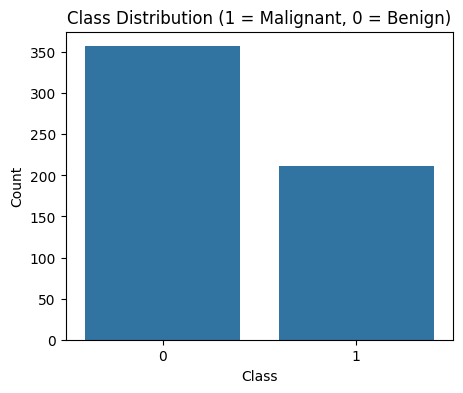

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
print(f"""num_nalignant: {len(y[y["diagnosis"]==1])}""")
print(f"""num_benign: {len(y[y["diagnosis"]==0])}""")
plt.figure(figsize=(5,4))
sns.countplot(x=y["diagnosis"])
plt.title("Class Distribution (1 = Malignant, 0 = Benign)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [3]:
import numpy as np

def calculate_zscore(column):

    col_mean = column.mean()
    col_std = column.std(ddof=1)

    if col_std == 0:
        return np.zeros_like(column)
    
    return abs((column - col_mean) / col_std)

x_z = x.apply(calculate_zscore)

print(x_z.head(10))

#aply z_score for original dtaframe 

   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.096100      2.071512        1.268817   0.983510         1.567087   
1     1.828212      0.353322        1.684473   1.907030         0.826235   
2     1.578499      0.455786        1.565126   1.557513         0.941382   
3     0.768233      0.253509        0.592166   0.763792         3.280667   
4     1.748758      1.150804        1.775011   1.824624         0.280125   
5     0.475956      0.834601        0.386808   0.505206         2.235455   
6     1.169878      0.160508        1.137124   1.094332         0.123028   
7     0.118413      0.358135        0.072803   0.218772         1.602639   
8     0.319885      0.588312        0.183919   0.383870         2.199903   
9     0.473118      1.104467        0.329192   0.508616         1.581308   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          3.280628        2.650542             2.530249       2.215566   
1          0.

In [4]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Compute mutual information between each feature and the label
mi_scores = mutual_info_classif(x, y, discrete_features=False, random_state=42)

mi_scores = pd.Series(mi_scores, index=x.columns)

mi_scores_sorted = mi_scores.sort_values(ascending=False)


/Users/raetan/.pyenv/versions/sc4020_2/lib/python3.12/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [5]:
mi_norm = (mi_scores - mi_scores.min()) / (mi_scores.max() - mi_scores.min())

x_z_combined = x_z * mi_norm
print(x_z_combined.head(3))

   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     0.841574      0.423834        1.081977   0.750434         0.264833   
1     1.403683      0.072290        1.436424   1.455095         0.139631   
2     1.211956      0.093254        1.334652   1.188408         0.159090   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          1.484003        2.109047             2.353095       0.308596   
1          0.220135        0.018958             0.509318       0.000194   
2          0.475876        1.083972             1.892929       0.130769   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                0.028124  ...      1.802684       0.346348         2.301575   
1                0.010830  ...      1.725518       0.094073         1.533776   
2                0.004962  ...      1.444554       0.006109         1.346291   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0 

In [6]:
from sklearn.preprocessing import KBinsDiscretizer

methods = ['uniform', 'quantile', 'kmeans']
labels = ['low', 'medium', 'high']
x_binned_dict = {}
sensitivity = []
for method in methods:
    kbd = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy=method)
    x_binned = pd.DataFrame(kbd.fit_transform(x), columns=x.columns)
    x_binned_val = x_binned.copy()
    x_binned = x_binned.applymap(lambda v: labels[int(v)])
    x_binned_dict[method] = x_binned
    mii = mutual_info_classif(x_binned_val, y[["diagnosis"]], discrete_features=True, random_state=42)
    for feature_name, mi_value in zip(x.columns, mii):
            sensitivity.append({
                "feature": feature_name,
                "strategy": method,
                "mi_score": mi_value
            })
df_sensitivity = pd.DataFrame(sensitivity)


/var/folders/ks/g_jt7zjj43s70nc71g14tzrm0000gn/T/ipykernel_10027/22062061.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  x_binned = x_binned.applymap(lambda v: labels[int(v)])
/Users/raetan/.pyenv/versions/sc4020_2/lib/python3.12/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/raetan/.pyenv/versions/sc4020_2/lib/python3.12/site-packages/sklearn/preprocessing/_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(
/var/folders/ks/g_jt7zjj43s70nc71g14tzrm0000gn/T/

In [7]:
# highest MI per feature

"""
# visualize
pivot = df_sensitivity.pivot(index='feature', columns='strategy', values='mi_score')
display(pivot.head())

import matplotlib.pyplot as plt
pivot.plot(kind='bar', figsize=(12,6))
plt.ylabel('Mutual Information Score')
plt.title('Sensitivity of MI to Binning Strategy')
plt.show()
"""
grouped = df_sensitivity.groupby("feature")

# 2️⃣ Compute mean, std, min, max of MI per feature
mi_stats = grouped["mi_score"].agg(["mean", "std", "min", "max"]).reset_index()

# 3️⃣ Add a new column showing range (difference between best and worst strategy)
mi_stats["range"] = mi_stats["max"] - mi_stats["min"]

# 4️⃣ Sort features by how sensitive (variable) their MI scores are
mi_stats = mi_stats.sort_values("range", ascending=False)

mi_stats

,feature,mean,std,min,max,range
1,area_se,0.163459,0.143144,0.008741,0.291188,0.282446
2,area_worst,0.293096,0.125414,0.156818,0.403661,0.246843
16,perimeter_se,0.127199,0.094850,0.026632,0.215049,0.188417
19,radius_se,0.135756,0.090166,0.033947,0.205533,0.171586
11,concavity_worst,0.233790,0.079831,0.141714,0.283640,0.141926
10,concavity_se,0.054706,0.061595,0.001661,0.122260,0.120599
9,concavity_mean,0.279692,0.060127,0.210738,0.321186,0.110449
0,area_mean,0.271673,0.051527,0.218344,0.321186,0.102842
7,concave points_se,0.087062,0.051970,0.029645,0.130881,0.101236
6,concave points_mean,0.355438,0.049642,0.298828,0.391536,0.092709


In [8]:
def get_top_k_ranked_features(row,row_disc=None, k=20):
    sorted_features = row.index.to_series().map(mi_scores_sorted).sort_values(ascending=False).index
    itemsets = []
    for feature in sorted_features[:min(k, len(sorted_features))]:
        itemsets.append([f"{row_disc[feature]}_{feature}"])
    return itemsets
    """
    df.columns = ['feature', 'value']  # force explicit column names
    
    sorted_features = (
        df.sort_values(by=['value', 'feature'], ascending=[False, True])
          .set_index('feature')['value']
    )
    top_k = sorted_features.head(k)
    itemsets = []
    for feature, value in top_k.items():
        itemsets.append([f"{row_disc[feature]}_{feature}"])
        #last_val = value
    # end of list, append current_set
    #if current_set: itemsets.extend(sorted(current_set))
    return itemsets
    """
sequence_dict = {}
for method in methods:
    sequences = [get_top_k_ranked_features(x_z.iloc[i],x_binned_dict[method].iloc[i], k=20) 
                for i in range(len(x_z))]
    sequence_dict[method] = sequences




In [ ]:
from collections import Counter
from pyspark.ml.fpm import PrefixSpan
from pyspark.sql import Row


from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, ArrayType, IntegerType
from pyspark.ml.fpm import PrefixSpan
spark = SparkSession.builder.appName("SequenceMining").getOrCreate()
from pyspark.sql import Row
gsp_sequences = sequence_dict["uniform"]
malig_seq = [] 
bnigh_seq = []
for (seq, label) in zip(sequence_dict["uniform"], y["diagnosis"]):
    if label==1: malig_seq.append(Row(sequence=seq))
    else: bnigh_seq.append(Row(sequence=seq))
mSequenceDF = spark.createDataFrame(malig_seq)
prefixSpan = PrefixSpan(maxPatternLength=5) \
        .setMinSupport(0.4) \
        .setSequenceCol("sequence") # Specify the column containing your sequences

bSequenceDF = spark.createDataFrame(bnigh_seq)
prefixSpan = PrefixSpan(maxPatternLength=5) \
        .setMinSupport(0.4) \
        .setSequenceCol("sequence") # Specify the column containing your sequences

print("======== malignant frequent sequence ========")
result = prefixSpan.findFrequentSequentialPatterns(mSequenceDF)
seq_list = [(row.sequence, row.freq) for row in result.collect()]
mx = max([len(seq) for seq,freq in seq_list])
for i,e in seq_list:
    if len(i)==mx: print(e, i)


print("======== benigh frequent sequence ========")
result = prefixSpan.findFrequentSequentialPatterns(bSequenceDF)
seq_list = [(row.sequence, row.freq) for row in result.collect()]
mx = max([len(seq) for seq,freq in seq_list])
for i,e in seq_list:
    if len(i)==mx: print(e, i)


Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
25/11/05 16:25:43 WARN Utils: Your hostname, Tans-MacBook-Air.local, resolves to a loopback address: 127.0.0.1; using 10.91.94.134 instead (on interface en0)
25/11/05 16:25:43 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/11/05 16:25:44 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


======== malignant frequent sequence ========


25/11/05 16:25:46 WARN PrefixSpan: Input data is not cached.


91 [['medium_concavity_mean'], ['low_area_se'], ['low_perimeter_se'], ['low_radius_se'], ['low_concavity_se']]
103 [['low_area_se'], ['low_perimeter_se'], ['low_concavity_se'], ['medium_texture_mean'], ['medium_smoothness_worst']]
142 [['low_area_se'], ['low_perimeter_se'], ['low_radius_se'], ['low_concavity_se'], ['medium_smoothness_worst']]
131 [['low_area_se'], ['low_perimeter_se'], ['low_radius_se'], ['low_concavity_se'], ['medium_texture_mean']]
147 [['low_area_se'], ['low_perimeter_se'], ['low_radius_se'], ['medium_texture_worst'], ['low_concavity_se']]
114 [['low_area_se'], ['low_perimeter_se'], ['low_radius_se'], ['medium_texture_worst'], ['medium_smoothness_worst']]
119 [['low_area_se'], ['low_perimeter_se'], ['low_radius_se'], ['medium_texture_worst'], ['medium_texture_mean']]
151 [['low_area_se'], ['low_perimeter_se'], ['low_radius_se'], ['low_concave points_se'], ['low_concavity_se']]
118 [['low_area_se'], ['low_perimeter_se'], ['low_radius_se'], ['low_concave points_se'], 

25/11/05 16:25:47 WARN PrefixSpan: Input data is not cached.


153 [['low_perimeter_se'], ['low_radius_se'], ['low_concavity_se'], ['low_texture_mean'], ['medium_smoothness_worst']]
253 [['low_perimeter_se'], ['low_radius_se'], ['low_compactness_worst'], ['low_concavity_se'], ['low_texture_mean']]
185 [['low_perimeter_se'], ['low_radius_se'], ['low_compactness_worst'], ['low_concavity_se'], ['medium_smoothness_worst']]
149 [['low_perimeter_se'], ['low_radius_se'], ['low_compactness_worst'], ['low_concavity_se'], ['low_smoothness_worst']]
322 [['low_perimeter_se'], ['low_radius_se'], ['low_compactness_worst'], ['low_concave points_se'], ['low_concavity_se']]
238 [['low_perimeter_se'], ['low_radius_se'], ['low_compactness_worst'], ['low_concave points_se'], ['low_texture_mean']]
194 [['low_perimeter_se'], ['low_radius_se'], ['low_compactness_worst'], ['low_concave points_se'], ['low_texture_worst']]
177 [['low_perimeter_se'], ['low_radius_se'], ['low_compactness_worst'], ['low_concave points_se'], ['medium_smoothness_worst']]
320 [['low_perimeter_se

'\n\nfeature(binned value) -> diagionosis -> 1 mi screo: \n\nmalignant case\nradius, texture, smoothness, concavity, compactness\n5, 10, 1, 2, 3\nper pateitn:\n    high_radus, low_texture, low_mootness, high concav, medium compsac, \n    low_raius, low_textrue, high_smooth, high concav, medium compact\n\n\nlong sub sequence \n\nlowtexture, highconcav, mediums compact -> maligannt case\n\n\ntexture, radiusm, compacteness , concavity, smoothness\n\n\nbengin case:\n\n\nfeature, mi_scoer sort by descending mi_scroe\n'

In [112]:
def confidence_calculation(freq_seqs, gsp_sequences):
    """Clean confidence calculation with proper rule semantics"""
    
    support_dict = dict(freq_seqs)
    results = []
    
    for seq, support in freq_seqs:
        if len(seq) > 1:
            prefix = seq[:-1]
            consequent = seq[-1]
            prefix_support = support_dict.get(tuple(prefix), 0)
            
            if prefix_support > 0:
                confidence = support / prefix_support
            else:
                confidence = 0.0
            
            # Extract feature names cleanly
            def get_feature_name(item):
                return str(item[0]) if isinstance(item, tuple) and len(item) == 1 else str(item)
            
            # Format prefix as combined condition
            prefix_features = []
            for itemset in prefix:
                if isinstance(itemset, tuple):
                    if len(itemset) == 1:
                        prefix_features.append(get_feature_name(itemset))
                    else:
                        prefix_features.append(" & ".join(get_feature_name(f) for f in itemset))
                else:
                    prefix_features.append(get_feature_name(itemset))
            
            prefix_str = " > ".join(prefix_features)
            consequent_str = get_feature_name(consequent)
            
            rule = f"({prefix_str}) → {consequent_str}"
        
            results.append({
                'sequence': seq,
                'support': support,
                'confidence': confidence,
                'rule': rule
            })
    
    return sorted(results, key=lambda x: (-x['confidence'], -x['support']))

for method in methods:

    results = confidence_calculation(freq_seq_dict[method],gsp_dict[method])

    print(f"ASSOCIATION RULES USING {method}")
    print("=" * 70)
    for i, result in enumerate(results[:5]):
        print(f"{i+1:2}. Conf: {result['confidence']:.3f}, Sup: {result['support']}, Rule: {result['rule']}")


    

ASSOCIATION RULES USING uniform
 1. Conf: 0.928, Sup: 64, Rule: (low_radius_mean > low_radius_worst > low_area_mean) → low_area_worst
 2. Conf: 0.900, Sup: 63, Rule: (low_radius_mean > low_perimeter_worst > low_area_mean) → low_area_worst
 3. Conf: 0.887, Sup: 71, Rule: (low_radius_mean > low_perimeter_mean > low_area_mean) → low_area_worst
 4. Conf: 0.868, Sup: 66, Rule: (low_perimeter_mean > low_perimeter_worst > low_area_mean) → low_area_worst
 5. Conf: 0.849, Sup: 62, Rule: (low_perimeter_mean > low_radius_worst > low_area_mean) → low_area_worst
ASSOCIATION RULES USING quantile
 1. Conf: 0.934, Sup: 57, Rule: (low_radius_mean > low_perimeter_mean > low_radius_worst) → low_area_worst
 2. Conf: 0.928, Sup: 64, Rule: (low_radius_mean > low_radius_worst > low_area_mean) → low_area_worst
 3. Conf: 0.902, Sup: 166, Rule: (low_radius_mean) → low_area_mean
 4. Conf: 0.900, Sup: 63, Rule: (low_radius_mean > low_perimeter_worst > low_area_mean) → low_area_worst
 5. Conf: 0.887, Sup: 71, Rule